In [24]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

In [25]:
import matplotlib as mpl
plt.style.use('seaborn-v0_8-paper')
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams['figure.dpi']=400
plt.rc('axes', titlesize=15)
plt.rc('axes', labelsize=15)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=12)    # fontsize of the tick labels
plt.rc('ytick', labelsize=12)    # fontsize of the tick labels
plt.rc('legend', fontsize=12)    # legend fontsize

In [26]:
# Time dependent language shift
def time_dep_shift(t,x):
	return s_t(t)*x**a_t(t)*(1-x)-(1-s_t(t))*(1-x)**a_t(t)*x

def plot_shift(solution,label,t_line=True,x_line=False):
    plt.plot(solution.t, solution.y[0], label=label, lw=3,c='#66c2a5')
    if t_line==True:
        for time in t_change:
            plt.axvline(time, linestyle='--', c='black',lw=1)
    if x_line==True:
        for s in (s0,s1,s2):
            x_star = 1/(1+(s/(1-s))**(1/(a0-1)))
            plt.axhline(x_star, linestyle='--', c='gray')
    return
    return

def s_t(t):
    if t<t_change[0]: s_t = s0
    elif t<t_change[1]: s_t = s1
    else: s_t=s2
    return s_t

def a_t(t):
    if t<t_change[0]: a_t = a0
    elif t<t_change[1]: a_t = a1
    else: a_t=a2
    return a_t

# Time span parameters
t_span = (0, 100)  # Simulate for t between 0 and 100
t_eval = np.linspace(*t_span, 1000)  # Time points where we want the solution

C:\Users\cisco\AppData\Local\Temp\ipykernel_15560\1154941470.py:3: RuntimeWarning: invalid value encountered in power
  return s_t(t)*x**a_t(t)*(1-x)-(1-s_t(t))*(1-x)**a_t(t)*x


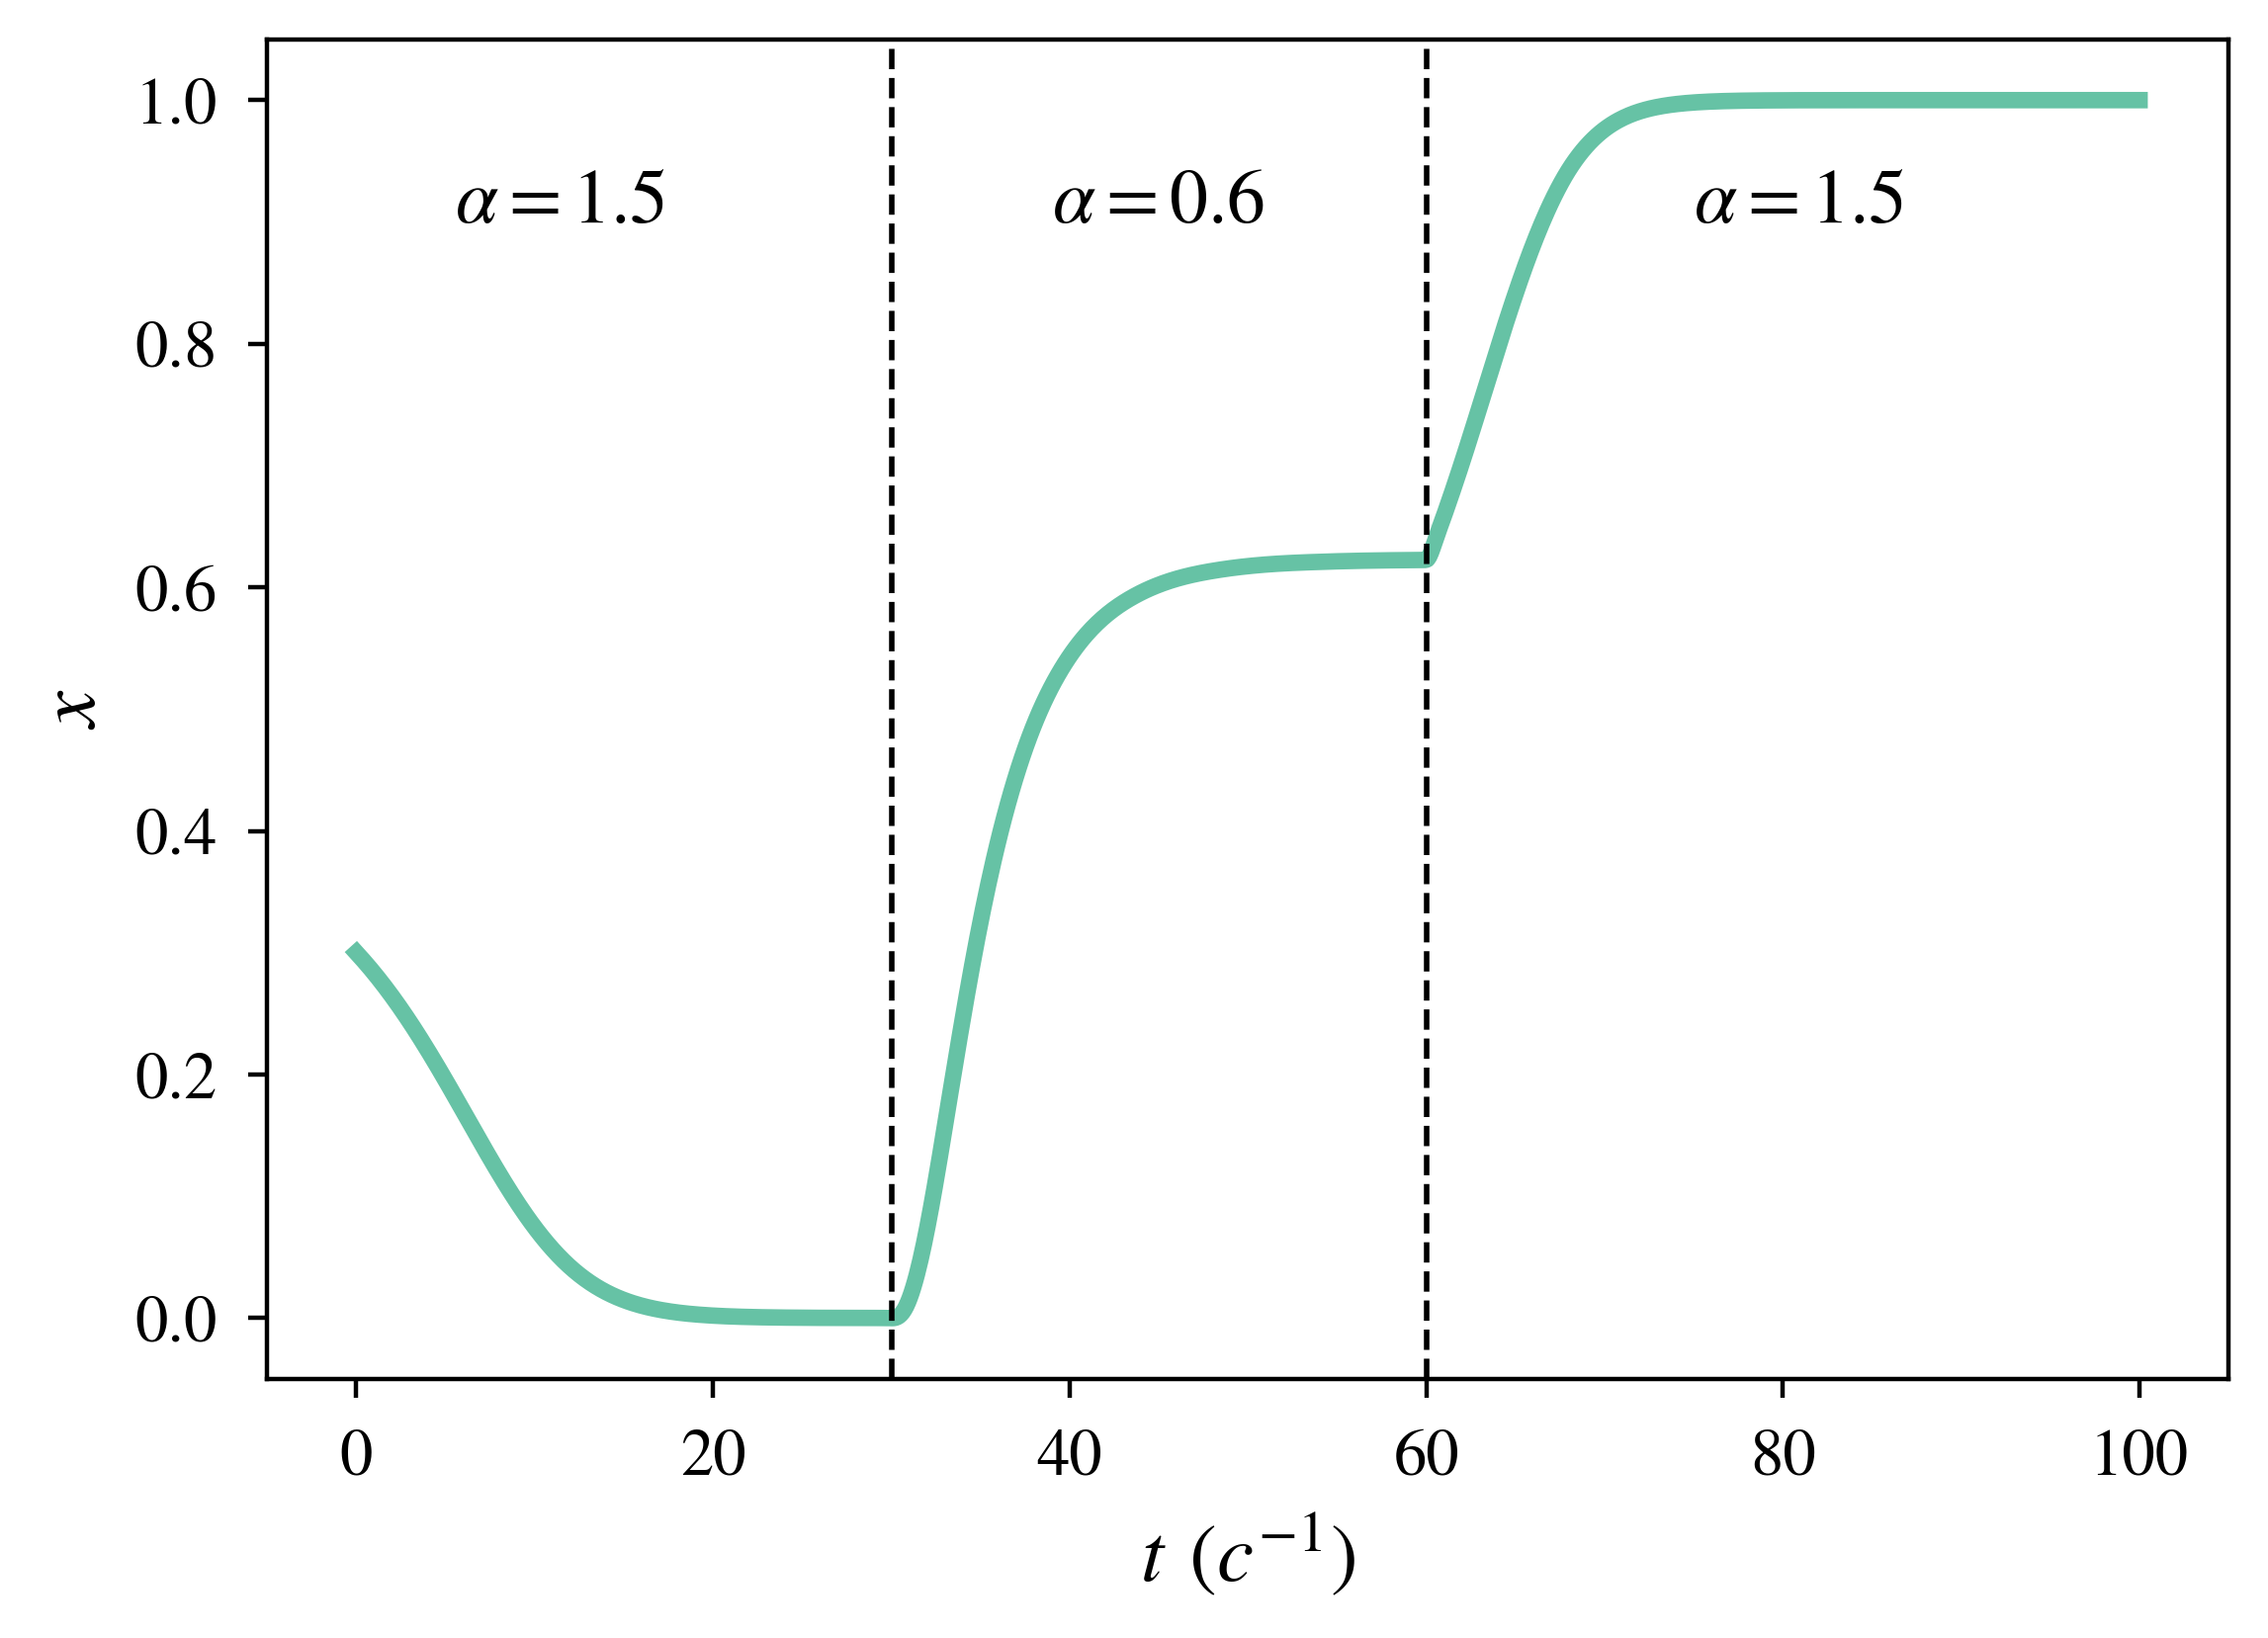

In [27]:
t_change =[30,60]
x0 = 0.3
s0,s1,s2 = 0.55,0.55,0.55
a0,a1,a2 = 1.5,0.6,1.5

solution = solve_ivp(time_dep_shift, t_span, [x0], t_eval=t_eval)
plot_shift(solution,label=f's0,s1={s0},{s1}')
plt.xlabel('$t\:\:(c^{-1})$')
plt.ylabel('$x$')
plt.text(5.5,0.9,'$\\alpha=1.5$', fontsize=14)
plt.text(39,0.9,'$\\alpha=0.6$', fontsize=14)
plt.text(75,0.9,'$\\alpha=1.5$', fontsize=14)


plt.ylim(-0.05,1.05)
plt.show()

C:\Users\cisco\AppData\Local\Temp\ipykernel_15560\1154941470.py:3: RuntimeWarning: invalid value encountered in power
  return s_t(t)*x**a_t(t)*(1-x)-(1-s_t(t))*(1-x)**a_t(t)*x


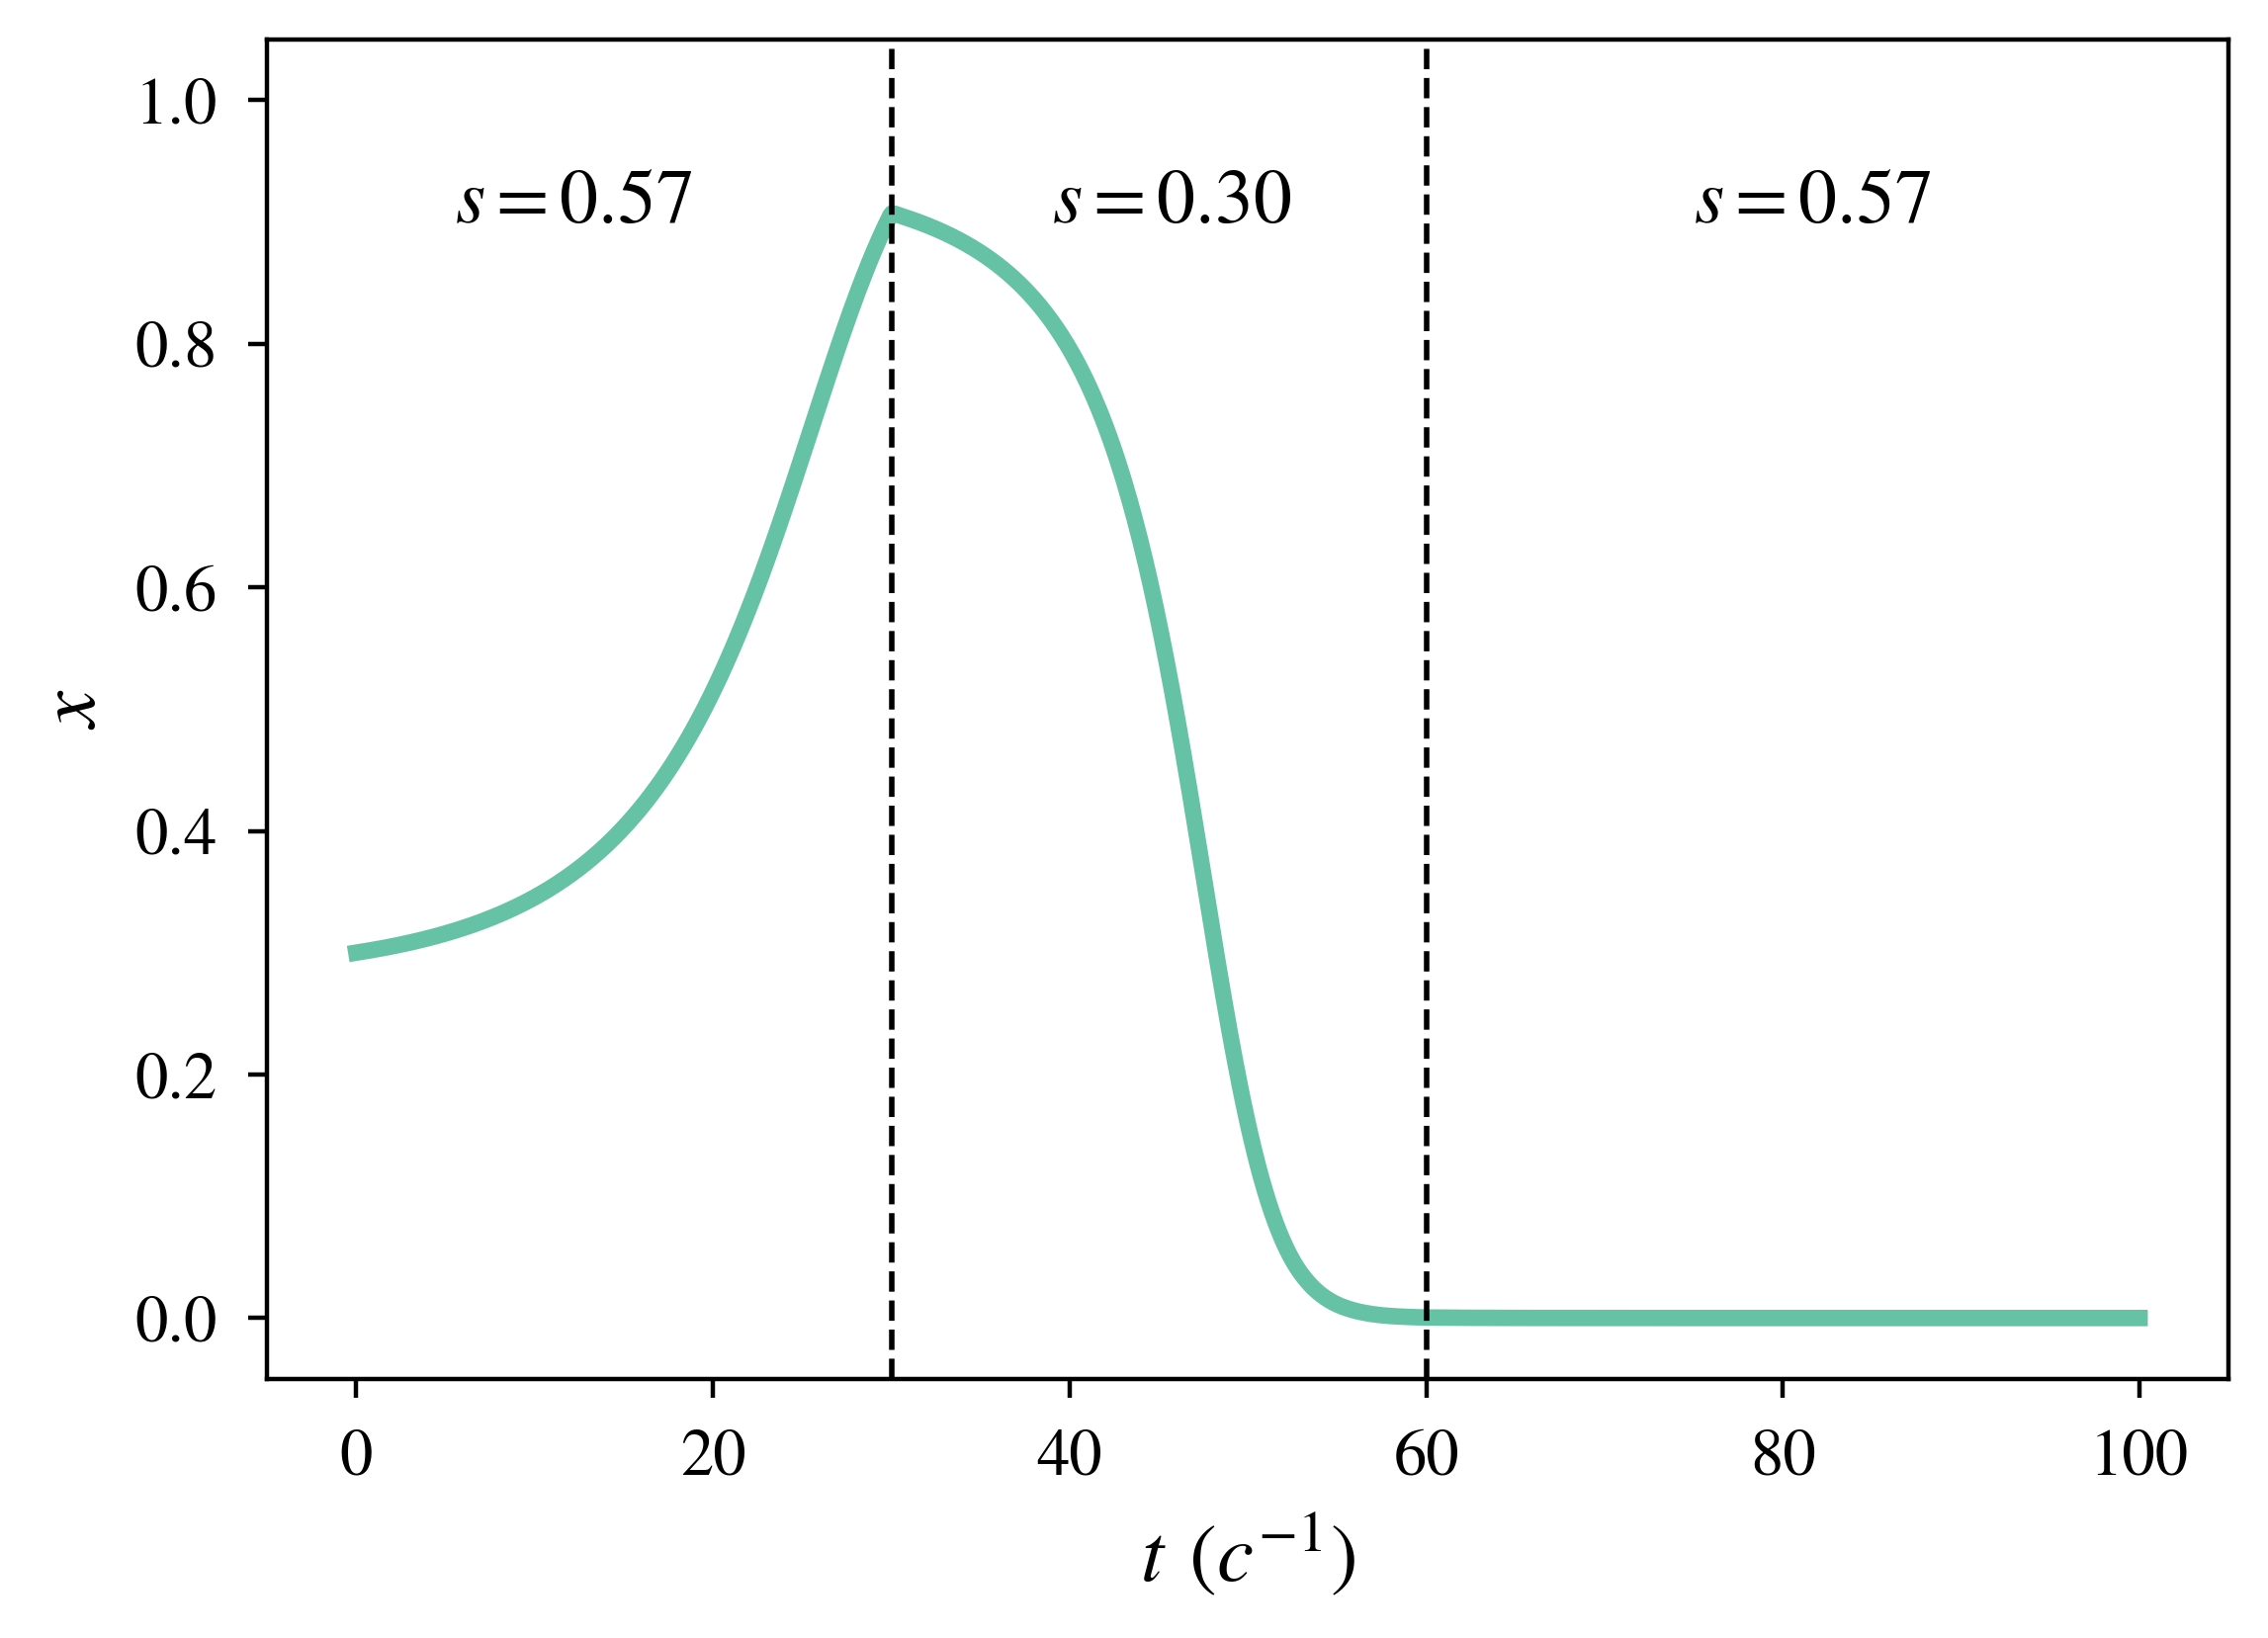

In [28]:
t_change =[30,60]
x0 = 0.3
s0,s1,s2 = 0.57,0.3,0.57
a0,a1,a2 = 1.3,1.3,1.3

solution = solve_ivp(time_dep_shift, t_span, [x0], t_eval=t_eval,method='DOP853')
plot_shift(solution,label=f's0,s1={s0},{s1}')
plt.xlabel('$t\:\:(c^{-1})$')
plt.ylabel('$x$')
plt.text(5.5,0.9,'$s=0.57$', fontsize=14)
plt.text(39,0.9,'$s=0.30$', fontsize=14)
plt.text(75,0.9,'$s=0.57$', fontsize=14)

plt.ylim(-0.05,1.05)
plt.show()